## Using all of the variables, except name and rating, run the k-means algorithm with k = 5 to identify clusters within the data.

## Loading Libraries and Cereal Data

In [1]:
# loading libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

#from sklearn.preprocessing import StandaradScaler

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans


In [2]:
# loading the data

dataset = pd.read_csv(r'D:\CMadhuri\cereal.csv')

dataset.dtypes

dataset=dataset.drop(['name'], axis = 1)

dataset=dataset.drop(['rating'], axis = 1)

dataset.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,NaN,0.33
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75


In [3]:
df = pd.DataFrame(dataset)
df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,NaN,0.33
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [4]:
df.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      1
cups        0
dtype: int64

In [5]:
# converting categorical to numerical

df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['mfr'], prefix = ['mfr'])
df_onehot = pd.get_dummies(df_onehot, columns=['type'], prefix = ['type'])
print(df_onehot.head())


   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8      -1        25   

   shelf  ...  cups  mfr_A  mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  type_C  \
0      3  ...  0.33      0      0      0      1      0      0      0       1   
1      3  ...  1.00      0      0      0      0      0      1      0       1   
2      3  ...  0.33      0      0      1      0      0      0      0       1   
3      3  ...  0.50      0      0      1      0      0      0      0       1   
4      3  ...  0.75      0      0      0      0      0      0      1       1   

   type_H  
0       0  
1       0  
2       0  
3       

In [6]:
## filling null vales with mean

from sklearn.impute import SimpleImputer
impute = SimpleImputer(fill_value= np.nan, strategy='mean')
x = impute.fit_transform(df_onehot)

x = pd.DataFrame(x, columns=df_onehot.columns)
X= x.to_numpy()   # to avoid invalid key error ... apply to

print(X)

[[ 70.   4.   1. ...   0.   1.   0.]
 [120.   3.   5. ...   0.   1.   0.]
 [ 70.   4.   1. ...   0.   1.   0.]
 ...
 [100.   3.   1. ...   1.   1.   0.]
 [100.   3.   1. ...   0.   1.   0.]
 [110.   2.   1. ...   0.   1.   0.]]


## Implementing K-means with 5 clusters

In [7]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 0 2 2 4 1 3 1 1 2 4 4 4 1 1 4 4 3 1 1 3 4 1 1 3 4 0 2 2 3 3 4 1 1 0 4 4
 4 1 1 4 1 1 0 1 1 1 4 4 1 1 1 2 4 0 0 1 0 2 1 0 4 4 0 0 0 3 4 0 4 2 1 4 3
 1 1 4]


## Using Elbow method to find the optimum clusters 

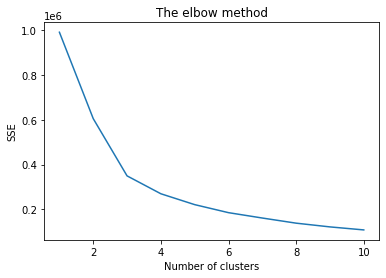

In [8]:
SSE =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') #within cluster sum of squares
plt.show()

## Visualizing Clustering

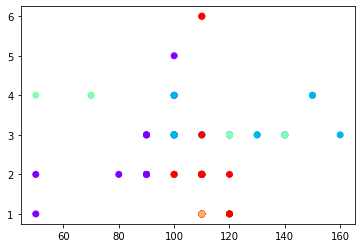

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='rainbow')
  

## Use DBSCAN for above dataset

##  Implementing DBSCAN 

In [22]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=.5, min_samples=10)
y_dbscan = clusters.fit_predict(x)
print(y_dbscan)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1]


##  Visualizing Clustering

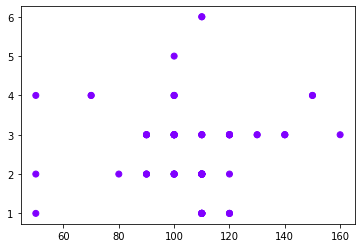

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y_dbscan, cmap='rainbow')